In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


Importación de Datos

In [235]:
df = pd.read_csv('gene_expression.csv')

In [236]:
df.shape

(3000, 3)

Análisis Exploratorio de Datos

In [237]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [238]:
df.tail()

,Gene One,Gene Two,Cancer Present
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0
2999,4.6,8.2,0


In [239]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


Identificamos valores faltantes

In [240]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [241]:
df.duplicated().sum()

862

Distribución de una variable numérica Gene One

In [242]:
fig = px.histogram(df, x='Gene One', nbins=20, title='Distribución de Gene One')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(barmode='group')
fig.show()

In [243]:
fig = px.histogram(df, x='Gene Two', nbins=20, title='Distribución de Gene Two')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(barmode='group')
fig.show()

In [244]:
fig = px.box(df, y=['Gene One', 'Gene Two'],
             title='Box plot de Gene One y Gene Two')
fig.show()

                Gene One  Gene Two  Cancer Present
Gene One        1.000000 -0.375427        0.545854
Gene Two       -0.375427  1.000000       -0.692352
Cancer Present  0.545854 -0.692352        1.000000


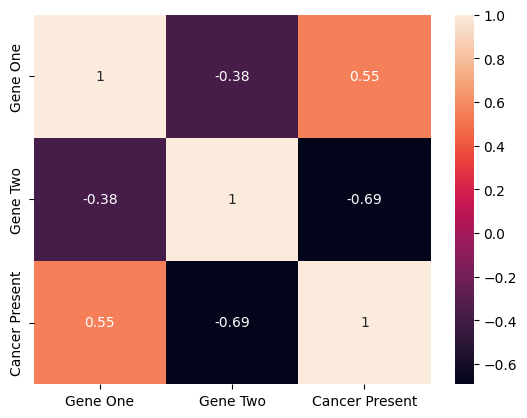

In [245]:
# Correlación entre las variables numéricas
corr = df.corr()
print(corr)

# Visualización de la matriz de correlación
sns.heatmap(corr, annot=True)
plt.show()

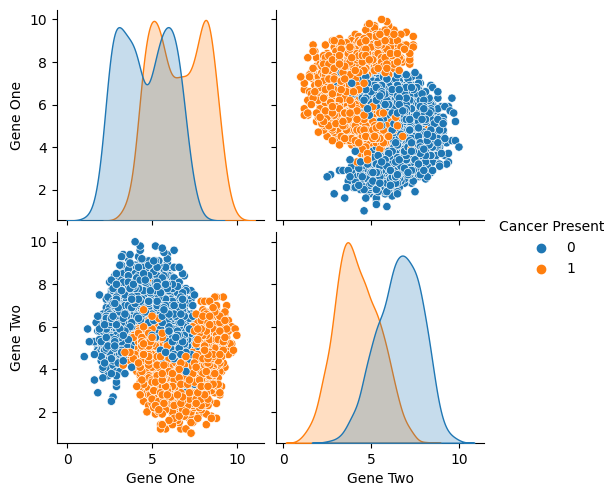

In [246]:
sns.pairplot(df, hue='Cancer Present')

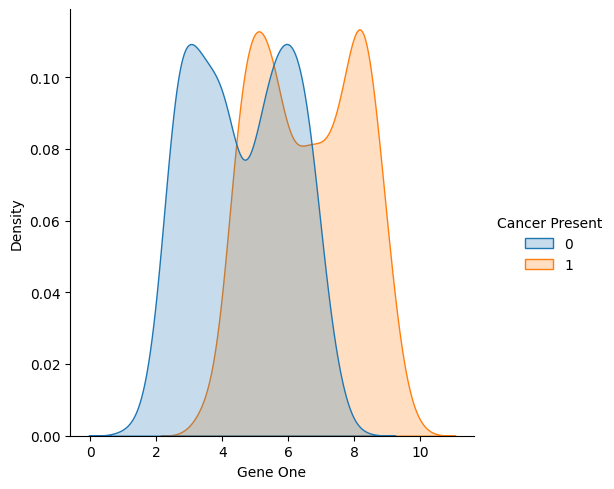

In [247]:
sns.displot(df, x="Gene One", hue="Cancer Present", kind="kde", fill=True)

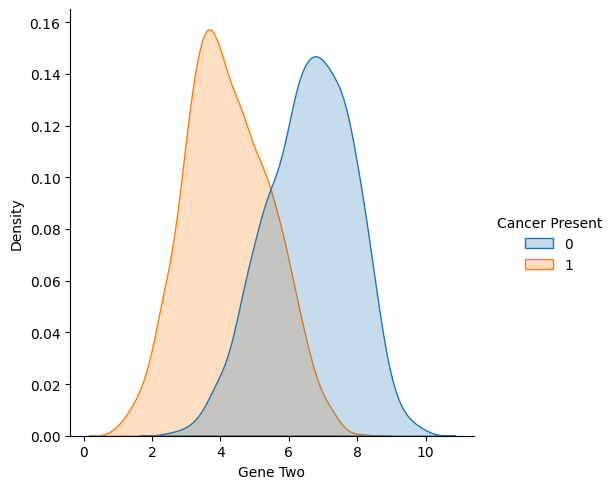

In [248]:
sns.displot(df, x="Gene Two", hue="Cancer Present", kind="kde", fill=True)

<AxesSubplot: xlabel='Cancer Present', ylabel='Gene One'>

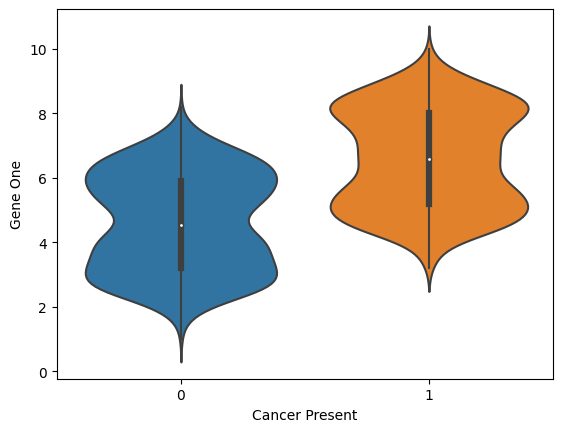

In [249]:
sns.violinplot(data=df, x="Cancer Present", y="Gene One")

<AxesSubplot: xlabel='Gene One', ylabel='Gene Two'>

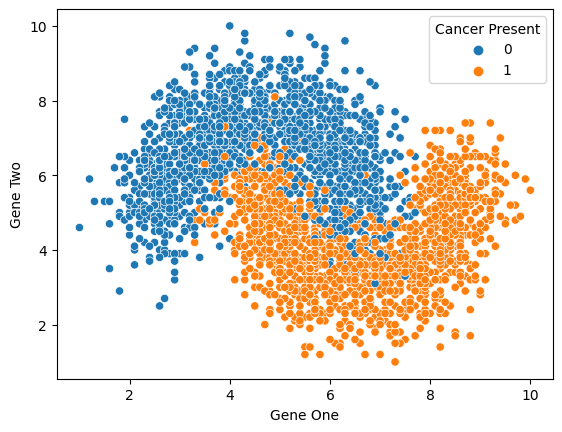

In [250]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue="Cancer Present")

Entrenamiento del modelo

In [251]:
from sklearn.model_selection import train_test_split


In [252]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [253]:
X_train, X_test,y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, random_state=101)

KNN = 1

In [254]:
from sklearn.neighbors import KNeighborsClassifier

In [255]:
modelo_knn = KNeighborsClassifier(n_neighbors=1)
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Evaluación del modelo

In [256]:
y_pred = modelo_knn.predict(X_test)

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [258]:
accuracy_score(y_test, y_pred)

0.9133333333333333

In [259]:
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

[[382  41]
 [ 37 440]]


Reporte de Clasificación K = 1

In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       423
           1       0.91      0.92      0.92       477

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



Tasa de Error K = 1

In [261]:
tasa_error = 1 - accuracy_score(y_test, y_pred)
print(f"{tasa_error*100}%")

8.666666666666668%


Método Elbow para seleccionar el mejor valor K

In [262]:
tasas_error = []

for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    tasas_error.append(np.mean(pred_i != y_test))
    

In [263]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 41)), y=tasas_error, 
                         mode='lines+markers', name='lines+markers'))
fig.update_layout(title='Tasa de error vs. K',
                     xaxis_title='K',
                     yaxis_title='Tasa de error')
fig.show()


Mejor valor K = 40

In [273]:
#Reentrenamos el modelo con el mejor valor K=40

modelo_knn = KNeighborsClassifier(n_neighbors=40)
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

Guardamos el modelo con K=40

In [274]:
import pickle
pickle.dump(modelo_knn, open('model.pkl','wb'))

Evaluamos el nuevo modelo

In [265]:
model = pickle.load(open('model.pkl','rb'))

y_pred = model.predict(X_test)

In [266]:
exactitud = accuracy_score(y_test, y_pred)
print(f"{exactitud*100}%")

94.22222222222221%


In [267]:
tasa_error = 1 - exactitud
print(f"{round(tasa_error*100,2)}%")

5.78%


In [268]:
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

[[395  28]
 [ 24 453]]


Reporte de clasificación para k = 40

In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       423
           1       0.94      0.95      0.95       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [270]:
#roc curve
probs = model.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
fig = go.Figure()
fig.add_trace(go.Scatter(x=false_positive_rate, y=true_positive_rate, 
                         mode='lines', name='lines'))
fig.update_layout(title='ROC curve',
                        xaxis_title='False Positive Rate',
                        yaxis_title='True Positive Rate')
fig.show()

AUC: 0.99


Prueba del modelo con valores aleatorios

In [275]:
gene_one_values = np.random.randint(1, 10, 5)
gene_two_values = np.random.randint(1, 10, 5)

# Nueva lista de pacientes
new_patients = []
for i in range(len(gene_one_values)):
    new_patient = [gene_one_values[i], gene_two_values[i]]
    new_patients.append(new_patient)


# Hacemos las predicciones
predictions = modelo_knn.predict(new_patients)

for index, prediction in enumerate(predictions):
    print(f"Valor predicho: {prediction}")  
    print(f"Gen 1: {new_patients[index][0]}")
    print(f"Gen 2: {new_patients[index][1]}")
    if prediction == 1:
        print("Tiene cancer\n")
    else:
        print("No tiene cancer\n")



Valor predicho: 1
Gen 1: 5
Gen 2: 4
Tiene cancer

Valor predicho: 0
Gen 1: 2
Gen 2: 9
No tiene cancer

Valor predicho: 1
Gen 1: 8
Gen 2: 5
Tiene cancer

Valor predicho: 1
Gen 1: 7
Gen 2: 1
Tiene cancer

Valor predicho: 1
Gen 1: 3
Gen 2: 2
Tiene cancer



c:\Users\luisb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

